In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
ufo_data=pd.read_csv('ufo-sightings-transformed.csv')
ufo_data.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,10/10/1949 20:30,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,10/10/1949 21:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,10/10/1955 17:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,10/10/1956 21:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,10/10/1960 20:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


# **<font color='red'>Data Summary</font>**

## <font color='blue'>.info() function </font><br>
The <font color='blue'>.info()</font> function will let us know our data types, and if we have any missing data. <br>
In our case:<br>1- We have missing values that we'll deal with it later.<br>2- We have to convert the attributes 'Date_time' and 'date_documented' to a datetime format

In [3]:
ufo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80328 entries, 0 to 80327
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    80328 non-null  object 
 1   date_documented              80328 non-null  object 
 2   Year                         80328 non-null  int64  
 3   Month                        80328 non-null  int64  
 4   Hour                         80328 non-null  int64  
 5   Season                       80328 non-null  object 
 6   Country_Code                 80069 non-null  object 
 7   Country                      80069 non-null  object 
 8   Region                       79762 non-null  object 
 9   Locale                       79871 non-null  object 
 10  latitude                     80328 non-null  float64
 11  longitude                    80328 non-null  float64
 12  UFO_shape                    78398 non-null  object 
 13  length_of_encoun

## <font color='blue'>.describe() function</font> <br>
The <font color='blue'>.describe()</font> function provides a summary of basic statistical measures for the numerical attributes that can help us get a quick understanding of the distribution and central tendencies of our data.

In [4]:
ufo_data.describe()

,Year,Month,Hour,latitude,longitude,length_of_encounter_seconds
count,80328.000000,80328.000000,80328.000000,80328.000000,80328.000000,8.032800e+04
mean,2003.850463,6.835026,15.525172,38.124963,-86.772015,9.017336e+03
std,10.426547,3.234876,7.753750,10.469146,39.697805,6.202322e+05
min,1906.000000,1.000000,0.000000,-82.862752,-176.658056,1.000000e-03
25%,2001.000000,4.000000,10.000000,34.134722,-112.073333,3.000000e+01
50%,2006.000000,7.000000,19.000000,39.412500,-87.903611,1.800000e+02
75%,2011.000000,9.000000,21.000000,42.788333,-78.755000,6.000000e+02
max,2014.000000,12.000000,23.000000,72.700000,178.441900,9.783600e+07


# **<font color='red'>Data Cleaning</font>**

## <font color='blue'>Handling missing values</font>

In our case we have 6 columns that contain missing values, and all of them are nominal. 

In [6]:
# .isnull() is a function that returns true when we have a missing value.
ufo_data.isnull().sum()

Date_time                         0
date_documented                   0
Year                              0
Month                             0
Hour                              0
Season                            0
Country_Code                    259
Country                         259
Region                          566
Locale                          457
latitude                          0
longitude                         0
UFO_shape                      1930
length_of_encounter_seconds       0
Encounter_Duration                0
Description                      15
dtype: int64

One of  the ways that we can handle missing nominal data is by replacing the missing value by the mode of the attribute. <br><br>
<font color='red'>Note:</font> We have to make sure that we don't have highly skewed class distributions.<br> In some cases, this method can make the data imbalanced if there are a huge number of missing values in our dataset.<br><br>


### How can we know if the skewness will be affected or not?<br>
We can either plot a bar plot or pie chart since both can be indicators of skewness.

In [15]:
category_counts=ufo_data['Country_Code'].value_counts()
print(category_counts)

Country_Code
USA    70878
CAN     3592
GBR     2350
AUS      630
IND      226
       ...  
OMN        1
AGO        1
KHM        1
TZA        1
LAO        1
Name: count, Length: 135, dtype: int64


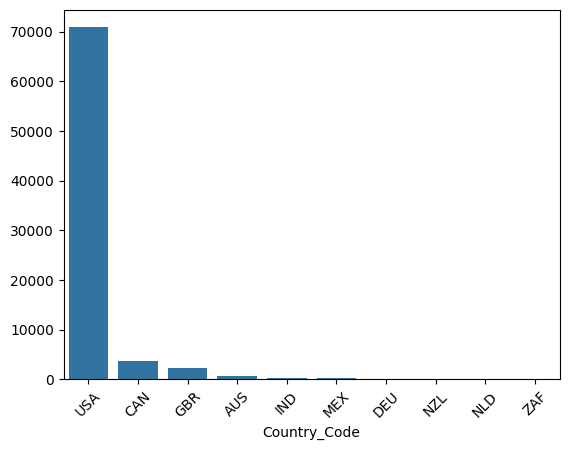

In [20]:
# Most 10 frequent countries:
top_countries=category_counts.head(10)
sns.barplot(x=top_countries.index,y=top_countries.values)
plt.xticks(rotation=45)
plt.show()